In [18]:
#import dataset from WP, convert time format for statistic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ps = pd.read_csv("fatal-police-shootings-data.csv")
ps['date'] = pd.to_datetime(ps['date'])
ps['year'] = ps['date'].dt.year
ps['period'] = ps['date'].dt.to_period('M')
ps['count'] = 1
ps

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,period,count
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,2015-01,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,2015-01,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,2015-01,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,2015-01,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,2015-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,6341,Ellis A. Frye,2020-11-26,shot,gun,62.0,M,B,Culpeper,VA,False,other,Not fleeing,False,-78.019,38.520,True,2020,2020-11,1
5814,6342,Michael Anthony Pena,2020-11-26,shot,undetermined,31.0,M,H,Lubbock,TX,False,undetermined,NaN,False,-102.030,33.543,True,2020,2020-11,1
5815,6338,NaN,2020-11-27,shot,gun,74.0,M,NaN,Marinette County,WI,False,other,Car,False,-88.065,45.358,True,2020,2020-11,1
5816,6340,NaN,2020-11-27,shot,gun,NaN,M,NaN,Wilsonville,OR,True,other,NaN,False,-122.834,45.278,True,2020,2020-11,1


In [19]:
fp = pd.read_csv("fatal-police-shootings-data.csv")
fp.loc[fp['signs_of_mental_illness'] == False, 'signs_of_mental_illness'] = 'mental_illness_no'
fp.loc[fp['signs_of_mental_illness'] == True, 'signs_of_mental_illness'] = 'mental_illness_yes'
fp.loc[fp['race'] == 'A', 'race'] = 'Asian'
fp.loc[fp['race'] == 'B', 'race'] = 'Black'
fp.loc[fp['race'] == 'H', 'race'] = 'Hispanic'
fp.loc[fp['race'] == 'N', 'race'] = 'Native'
fp.loc[fp['race'] == 'W', 'race'] = 'White'
fp.loc[fp['race'] == 'O', 'race'] = 'Other'
fp.loc[fp['gender'] == 'M', 'gender'] = 'Male'
fp.loc[fp['gender'] == 'F', 'gender'] = 'Female'
fp.loc[fp['body_camera'] == False, 'body_camera'] = 'body_camera_no'
fp.loc[fp['body_camera'] == True, 'body_camera'] = 'body_camera_yes'
fp = fp.drop(columns=['is_geocoding_exact'])
fp.to_csv('fp.csv')
fp

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,mental_illness_yes,attack,Not fleeing,body_camera_no,-123.122,47.247
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,mental_illness_no,attack,Not fleeing,body_camera_no,-122.892,45.487
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,mental_illness_no,other,Not fleeing,body_camera_no,-97.281,37.695
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,mental_illness_yes,attack,Not fleeing,body_camera_no,-122.422,37.763
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,mental_illness_no,attack,Not fleeing,body_camera_no,-104.692,40.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,6341,Ellis A. Frye,2020-11-26,shot,gun,62.0,Male,Black,Culpeper,VA,mental_illness_no,other,Not fleeing,body_camera_no,-78.019,38.520
5814,6342,Michael Anthony Pena,2020-11-26,shot,undetermined,31.0,Male,Hispanic,Lubbock,TX,mental_illness_no,undetermined,NaN,body_camera_no,-102.030,33.543
5815,6338,NaN,2020-11-27,shot,gun,74.0,Male,NaN,Marinette County,WI,mental_illness_no,other,Car,body_camera_no,-88.065,45.358
5816,6340,NaN,2020-11-27,shot,gun,NaN,Male,NaN,Wilsonville,OR,mental_illness_yes,other,NaN,body_camera_no,-122.834,45.278


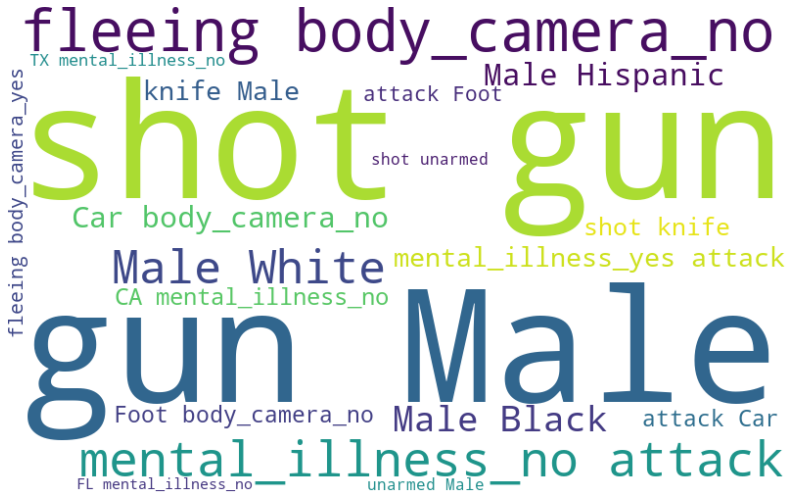

In [20]:
# Display frequent pattern by word cloud
# importing the necessery modules 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import csv 
  
# file object is created 
file_ob = open(r"fp.csv") 
  
# reader object is created 
reader_ob = csv.reader(file_ob) 
  
# contents of reader object is stored . 
# data is stored in list of list format. 
reader_contents = list(reader_ob) 
  
# empty string is declare 
text = "" 
  
# iterating through list of rows 
for row in reader_contents : 
      
    # iterating through words in the row 
    for word in row : 
  
        # concatenate the words 
        text = text + " " + word 
  
wordcloud = WordCloud(background_color="white", max_words=20, width=800, height=500,relative_scaling=0.5).generate(text) 
plt.figure(figsize = (16,9)) #increase the picture's resolution
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

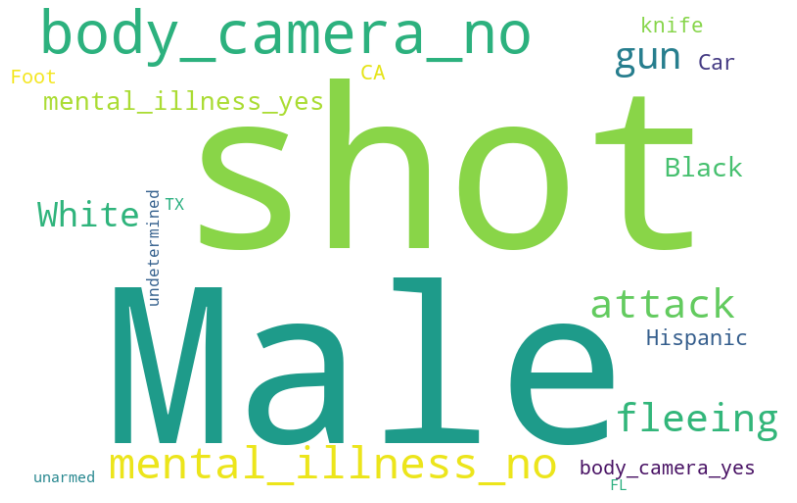

In [22]:
# importing the necessery modules 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import csv 
  
# file object is created 
file_ob = open(r"fp.csv") 
  
# reader object is created 
reader_ob = csv.reader(file_ob) 
  
# contents of reader object is stored . 
# data is stored in list of list format. 
reader_contents = list(reader_ob) 
  
# empty string is declare 
text = "" 
  
# iterating through list of rows 
for row in reader_contents : 
      
    # iterating through words in the row 
    for word in row : 
  
        # concatenate the words 
        text = text + " " + word 
  
wordcloud = WordCloud(background_color="white", max_words=20, width=800, height=500,relative_scaling=0.5, collocations=False).generate(text) 
plt.figure(figsize = (16,9)) #increase the picture's resolution
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

In [23]:
# Frequent pattern mining
#  
import operator
import time

class Conditional_FP_Tree:
    def __init__(self, item, support, parentNode):
        self.name = item
        self.count = support
        self.nodeLink = None
        self.parent = parentNode
        self.children = {}

    def support_count(self, support):
        self.count += support
'''
    def display(self, depth = 1):
        print(' '*depth, self.name, ' ', self.count)
        for child in self.children.values():
            child.display(depth + 1)
'''

'''
def find_frequent_items(D, min_sup:int):
    item_count = defaultdict(int)
    for row in D:
        for item in row:
            item_count[item] += 1
    items = dict()
    for item, count in item_count.items():
        if count >= min_sup:
            items.update({item: count})
    F = sorted(items.items(), key=operator.itemgetter(1), reverse=True)
    return F
'''

def create_FP_Tree(D, min_sup:int):
    # To create FP Tree, create headertable first.
    headertable = {}
    for row in D:
        for item in row:
            headertable[item] = headertable.get(item, 0) + D[row]
    # The headertable include item name and support count.
    remove = []
    for key in headertable.keys():
        if headertable[key] < min_sup:
            remove.append(key)
    for item in remove:
        headertable.pop(item)
    # If item is not frequent, then remove from headertable.
    ### frequent_itemset = find_frequent_items(D, min_sup)
    frequent_itemset = sorted(headertable.items(), key=operator.itemgetter(1), reverse=True)
    if len(frequent_itemset) != 0:
        for item in headertable:
            headertable[item] = [headertable[item], None]
            # create node link.
            # Now headertable contains itemname, support count, and node link for each item.
        FPTree = Conditional_FP_Tree('Null', 1, None)
        # root node: item = Null, support = 1, Parent = None
        for transaction, support in D.items():
            treegrowth = {}
            for item in transaction:
                if item in set(headertable.keys()):
                    treegrowth[item] = headertable[item][0]
                    # only need frequency here
                    # treegrowth contains all unique frequent items in each transaction in turn
            if len(treegrowth) > 0:
                sortgrowth = sorted(treegrowth.items(), key=operator.itemgetter(1), reverse=True)
                # To build the tree, sort by support count. Highest comes first.
                nextitemset = []
                for item in sortgrowth:
                    nextitemset.append(item[0])
                # THIS IS SOMETHING NEW TO ME: orderedItems = [v[0] for v in st]
                # MORE EFFICIENT CODING THIS WAY.
                updateFPTree(nextitemset, FPTree, headertable, support)
                # Update tree for each transaction in turn to construct the whole tree.
        return FPTree, headertable
    else:
        return None, None

'''
============ Insert Tree =============
'''

def updateFPTree(itemset, tobeupdateTree, headertable, support):
    # Update tree for item in the chosen itemset one by one.
    # Finish by recursion
    if itemset[0] in tobeupdateTree.children:
        # If the item is already one child of the current tree, then update the support count.
        tobeupdateTree.children[itemset[0]].support_count(support)
    else:
        # Call to build a new branch of the conditional tree and update the headertable.
        tobeupdateTree.children[itemset[0]] = Conditional_FP_Tree(itemset[0], support, tobeupdateTree)
        if headertable[itemset[0]][1] == None:
            # If there is no nodeLink, then create one.
            headertable[itemset[0]][1] = tobeupdateTree.children[itemset[0]]
        else:
            # If there is a nodeLink, then update it.
            updatenodeLink(headertable[itemset[0]][1], tobeupdateTree.children[itemset[0]])
    # Recursion
    if len(itemset) > 1:
        new_itemset = itemset[1::]
        updateFPTree(new_itemset, tobeupdateTree.children[itemset[0]], headertable, support)

def updatenodeLink(new_node, target_node):
    # Based on Figure 6.7, all linked nodes are as nodes in linked list.
    # When there is a nodeLink, then find the end node and add the new link.
    while new_node.nodeLink != None:
        new_node = new_node.nodeLink
    new_node.nodeLink = target_node

'''
============== Top-down finished. Now starts bottom-up. ==============
'''

def bottom_up_Tree(leafnode, path):
    # Recursion again
    if leafnode.parent != None:
        # We have not reached the root node yet.
        path.append(leafnode.name) # grow up
        bottom_up_Tree(leafnode.parent, path)
    return path

def find_path(node):
    # Recursion again...
    conditional_pattern_base = {}
    while node != None:
        path = []
        updatepath = bottom_up_Tree(node, path)
        if len(updatepath) > 1:
            conditional_pattern_base[frozenset(updatepath[1:])] = node.count
            # node is the leafnode for this certain path,
            # so its support count should be the minimum support count of all nodes in the path
            # Use the minimun support count of all nodes in the path as the support count of the path.
            # conditional pattern base stored all paths and their support counts.
        node = node.nodeLink
        # Start from the bottom and move to the parent to find all paths.
    return conditional_pattern_base

'''
============== Mine Frequent Patterns ==============
'''

def FP_Growth(headertable, prefix_path, min_sup:int, frequent_itemset):
    # beta = [alpha[0] for alpha in sorted(headertable.items(), key=operator.itemgetter(1))] why bug?
    beta = [alpha[0] for alpha in sorted(headertable.items(), key=lambda p: p[1][0])]
    # Start from the bottom frequent_1_itemset: leafnode
    # Use each one of the frequent_1_item as the leafnode, updating path with len(path) increase by 1 each time.
    for base_node in beta:
        newfreqitemset = prefix_path.copy()
        newfreqitemset.add(base_node)
        frequent_itemset.append((newfreqitemset, headertable[base_node][0]))
        conditional_pattern_base = find_path(headertable[base_node][1])
        conditional_FPTree, conditional_headertable = create_FP_Tree(conditional_pattern_base, min_sup)
        if conditional_headertable != None:
            # As long as there is frequent itemset, recurse.
            FP_Growth(conditional_headertable, newfreqitemset, min_sup, frequent_itemset)
    return frequent_itemset

######################################################################################################################

if __name__ == "__main__":
    start_time = time.time()
    with open('fp.csv') as file:
        ds = file.readlines()
    transactions = []
    for i in range(len(ds)):
        transactions.append(ds[i].strip().split(','))
    Dataset = {}
    for transaction in transactions:
        Dataset[frozenset(transaction)] = 1
    Frequent_Itemset = []
    Prefix_Path = set([])
    min_sup = len(transactions) * 0.5
    FPTree, HeaderTable = create_FP_Tree(Dataset, min_sup)
    FrequentItemset = FP_Growth(HeaderTable, Prefix_Path, min_sup, Frequent_Itemset)
    print(FrequentItemset)
    # print(len(FrequentItemset))
    print("The executing time of the FP-Growth algorithm is %s seconds." % (time.time() - start_time))


[({'gun'}, 3322), ({'gun', 'body_camera_no'}, 2955), ({'gun', 'body_camera_no', 'shot'}, 2920), ({'gun', 'Male'}, 3209), ({'gun', 'Male', 'shot'}, 3166), ({'gun', 'shot'}, 3279), ({'Not fleeing'}, 3609), ({'Not fleeing', 'body_camera_no'}, 3155), ({'shot', 'Not fleeing', 'body_camera_no'}, 2982), ({'Not fleeing', 'body_camera_no', 'Male'}, 3001), ({'shot', 'Not fleeing'}, 3399), ({'shot', 'Not fleeing', 'Male'}, 3228), ({'Not fleeing', 'Male'}, 3431), ({'attack'}, 3762), ({'mental_illness_no', 'attack'}, 2923), ({'body_camera_no', 'attack'}, 3334), ({'body_camera_no', 'attack', 'Male'}, 3198), ({'shot', 'body_camera_no', 'attack', 'Male'}, 3073), ({'shot', 'body_camera_no', 'attack'}, 3208), ({'shot', 'attack'}, 3614), ({'attack', 'Male'}, 3614), ({'shot', 'attack', 'Male'}, 3467), ({'mental_illness_no'}, 4469), ({'mental_illness_no', 'body_camera_no'}, 3959), ({'shot', 'mental_illness_no', 'body_camera_no'}, 3797), ({'shot', 'mental_illness_no', 'body_camera_no', 'Male'}, 3645), ({'me

In [3]:
#Bar plot police shooting total count of each year according to WP data (12/01/2020)
#In order to match WP chart, it does not exlude "unknow" race data
table_1 = pd.pivot_table(ps, values=['count'], index=['year'], aggfunc=np.sum)
table_1

,count
year,
2015,994
2016,961
2017,986
2018,990
2019,999
2020,888


Text(0.5, 1.0, 'Total Police Shooting Number per Year')

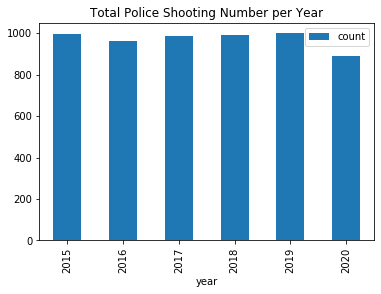

In [4]:
table_1.plot.bar()
plt.title('Total Police Shooting Number per Year')

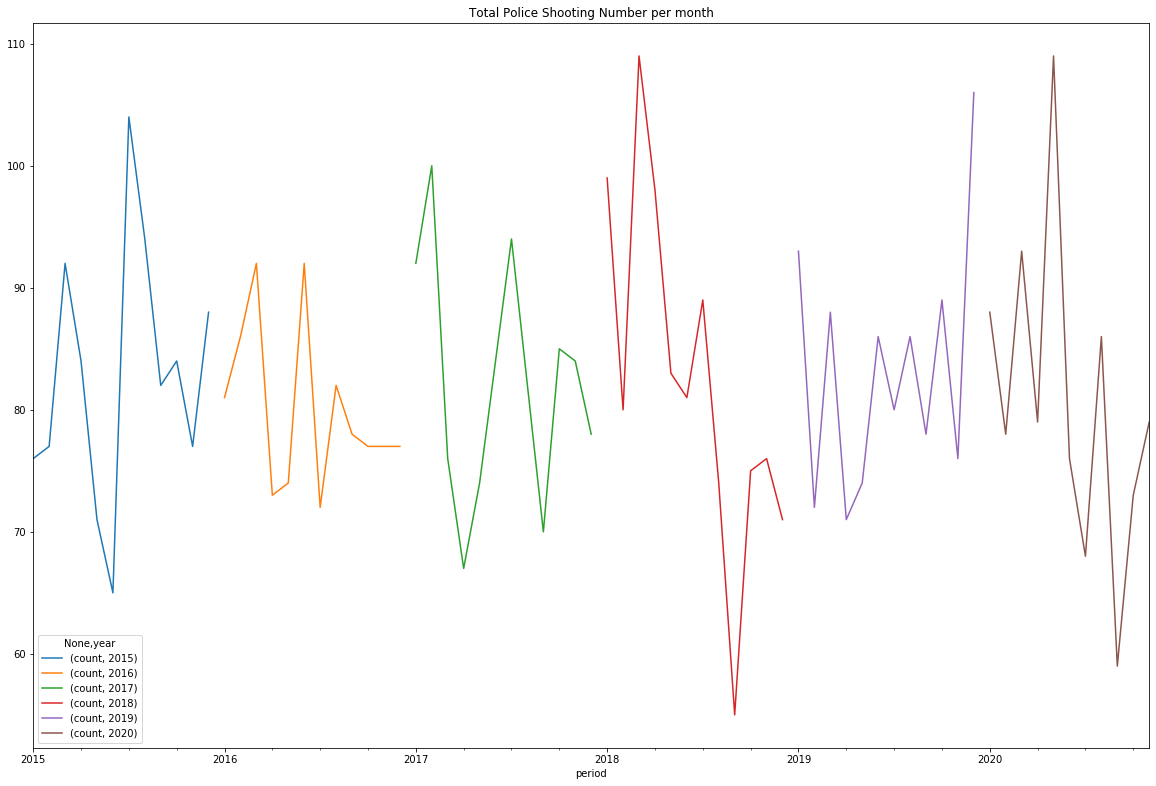

In [17]:
table_2 = pd.pivot_table(ps, values=['count'], index=['period'], columns= ['year'], aggfunc=np.sum)
table_2.plot.line(figsize = (20,40/3))

plt.title('Total Police Shooting Number per month')
table_2.to_excel('table_2.xlsx')

In [33]:
ps["place"] = ps["state"] + "-" + ps["city"]
ps

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,count,place
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1,WA-Shelton
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1,OR-Aloha
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1,KS-Wichita
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1,CA-San Francisco
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1,CO-Evans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,6341,Ellis A. Frye,2020-11-26,shot,gun,62.0,M,B,Culpeper,VA,False,other,Not fleeing,False,-78.019,38.520,True,2020,1,VA-Culpeper
5814,6342,Michael Anthony Pena,2020-11-26,shot,undetermined,31.0,M,H,Lubbock,TX,False,undetermined,NaN,False,-102.030,33.543,True,2020,1,TX-Lubbock
5815,6338,NaN,2020-11-27,shot,gun,74.0,M,NaN,Marinette County,WI,False,other,Car,False,-88.065,45.358,True,2020,1,WI-Marinette County
5816,6340,NaN,2020-11-27,shot,gun,NaN,M,NaN,Wilsonville,OR,True,other,NaN,False,-122.834,45.278,True,2020,1,OR-Wilsonville


In [6]:
state = pd.pivot_table(ps, values=['count'], index=['state'], columns=['year'], aggfunc=np.sum)
state.to_excel('state.xlsx')

In [31]:
#Display polices shooting rate on map
import plotly.graph_objects as go

import pandas as pd
df = pd.read_excel('state1.xlsx')

fig = go.Figure(data=go.Choropleth(
    locations=df['state'], # Spatial coordinates
    z = df['police shooting per 1m'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "police shooting per 1m",
))

fig.update_layout(
    title_text = 'Yearly average fatal police shooting per 1m by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [35]:
#Display polices shooting number on map
df = pd.read_excel('state1.xlsx')

fig = go.Figure(data=go.Choropleth(
    locations=df['state'], # Spatial coordinates
    z = df['average police shooting by year'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Average police shooting by year",
))

fig.update_layout(
    title_text = 'Yearly average fatal police shooting by state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [37]:
#Display polices shooting number on map
df = pd.read_excel('state_all.xlsx')

fig = go.Figure(data=go.Choropleth(
    locations=df['Acronym'], # Spatial coordinates
    z = df['Gun Ownership rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'blues',
    colorbar_title = "Gun Ownership rate",
))

fig.update_layout(
    title_text = 'Gun Ownership rate',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [32]:
#Display U.S. history of territory expansion

df = pd.read_excel('state_all.xlsx')

fig = go.Figure(data=go.Choropleth(
    locations=df['Acronym'], # Spatial coordinates
    z = df['State year'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'blues',
    colorbar_title = "State year",
))



fig.update_layout(
    title_text = 'U.S. history of territory expansion',
    geo_scope='usa', # limite map scope to USA
)



fig.show()


In [34]:
#Display police basic training 

df = pd.read_excel('state_all.xlsx')

fig = go.Figure(data=go.Choropleth(
    locations=df['Acronym'], # Spatial coordinates
    z = df['Police Basic Training hours'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'blues',
    colorbar_title = "Police Basic Training hours",
))



fig.update_layout(
    title_text = 'Police Basic Training hours by state',
    geo_scope='usa', # limite map scope to USA
)



fig.show()

In [53]:
import plotly.express as px
df2 =  pd.read_excel('state_all.xlsx')
fig2 = px.scatter_geo(df2, locations="Acronym",
                     hover_name="State", size="Average shooting per 1,000,000",
                     locationmode = 'USA-states')

fig2.update_layout(
        title = 'Average shooting per 1,000,000',
        geo_scope='usa',
    )
fig2.show()

In [40]:
#Analyze correlation between polices shooting and other variables
state_all = pd.read_excel('state_all.xlsx')
corr = state_all.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Total shooting,Violent crime,Population,"Average shooting per 1,000,000","Violent rate per 1,000",State year,Land area(sqmi),Populatiion per sqmi,Gun Ownership rate,Unemployment rate,Percent black,Bachelor's degree or higher,Poverty Rate,Violent rate,Police Basic Training hours,Month before work
Total shooting,1,0.92,0.89,0.13,0.13,0.046,0.26,-0.11,-0.093,0.22,0.05,-0.088,0.16,0.13,-0.008,-0.16
Violent crime,0.92,1,0.98,-0.11,0.15,-0.14,0.19,-0.061,-0.21,0.27,0.16,-0.01,0.14,0.15,0.036,-0.13
Population,0.89,0.98,1,-0.2,0.02,-0.19,0.15,-0.081,-0.28,0.23,0.14,0.038,0.061,0.02,0.094,-0.12
"Average shooting per 1,000,000",0.13,-0.11,-0.2,1,0.48,0.68,0.59,-0.093,0.64,0.29,-0.2,-0.36,0.37,0.48,-0.2,0.069
"Violent rate per 1,000",0.13,0.15,0.02,0.48,1,0.095,0.34,0.54,0.34,0.55,0.46,0.1,0.47,1,0.0093,-0.12
State year,0.046,-0.14,-0.19,0.68,0.095,1,0.56,-0.23,0.55,-0.071,-0.58,-0.26,-0.1,0.095,-0.35,-0.072
Land area(sqmi),0.26,0.19,0.15,0.59,0.34,0.56,1,-0.17,0.42,0.27,-0.25,-0.17,-0.0091,0.34,-0.13,0.027
Populatiion per sqmi,-0.11,-0.061,-0.081,-0.093,0.54,-0.23,-0.17,1,-0.62,0.27,0.49,0.66,0.12,0.54,0.28,-0.17
Gun Ownership rate,-0.093,-0.21,-0.28,0.64,0.34,0.55,0.42,-0.62,1,0.055,-0.12,-0.6,0.38,0.34,-0.35,0.19
Unemployment rate,0.22,0.27,0.23,0.29,0.55,-0.071,0.27,0.27,0.055,1,0.4,-0.068,0.51,0.55,0.18,-0.02


In [33]:
#Analyze correlation between polices shooting and other variables
state_all = pd.read_excel('state_all1.xlsx')
corr = state_all.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,"Average shooting per 1,000,000","Violent rate per 1,000",State year,Land area(sqmi),Populatiion per sqmi,Gun Ownership rate,Unemployment rate,Percent black,Bachelor's degree or higher,Poverty Rate,Violent rate,Police Basic Training hours,Month before work
"Average shooting per 1,000,000",1,0.48,0.68,0.59,-0.093,0.64,0.29,-0.2,-0.36,0.37,0.48,-0.2,0.069
"Violent rate per 1,000",0.48,1,0.095,0.34,0.54,0.34,0.55,0.46,0.1,0.47,1,0.0093,-0.12
State year,0.68,0.095,1,0.56,-0.23,0.55,-0.071,-0.58,-0.26,-0.1,0.095,-0.35,-0.072
Land area(sqmi),0.59,0.34,0.56,1,-0.17,0.42,0.27,-0.25,-0.17,-0.0091,0.34,-0.13,0.027
Populatiion per sqmi,-0.093,0.54,-0.23,-0.17,1,-0.62,0.27,0.49,0.66,0.12,0.54,0.28,-0.17
Gun Ownership rate,0.64,0.34,0.55,0.42,-0.62,1,0.055,-0.12,-0.6,0.38,0.34,-0.35,0.19
Unemployment rate,0.29,0.55,-0.071,0.27,0.27,0.055,1,0.4,-0.068,0.51,0.55,0.18,-0.02
Percent black,-0.2,0.46,-0.58,-0.25,0.49,-0.12,0.4,1,0.18,0.44,0.46,0.021,0.029
Bachelor's degree or higher,-0.36,0.1,-0.26,-0.17,0.66,-0.6,-0.068,0.18,1,-0.5,0.1,0.38,-0.24
Poverty Rate,0.37,0.47,-0.1,-0.0091,0.12,0.38,0.51,0.44,-0.5,1,0.47,-0.037,0.2


In [66]:
import math
0.68*math.sqrt(48/(1-0.68*0.68))

6.425396041156865

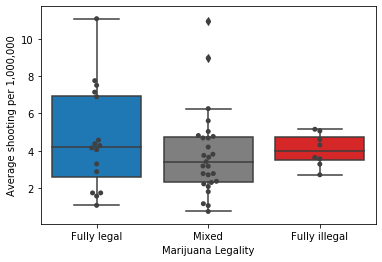

In [4]:
import pandas as pd
import seaborn as sns
state_all = pd.read_excel("state_all.xlsx")
ax = sns.boxplot(x='Marijuana Legality', y='Average shooting per 1,000,000', data=state_all)
ax = sns.swarmplot(x='Marijuana Legality', y='Average shooting per 1,000,000', data=state_all, color='0.25')
# Select which box to change color    
fl = ax.artists[0]
ml = ax.artists[1]
fi = ax.artists[2]

# Change the appearance of that box
fl.set_facecolor('tab:blue')
ml.set_facecolor('tab:gray')
fi.set_facecolor('tab:red')

In [ ]:
#ANOVA test is done by R

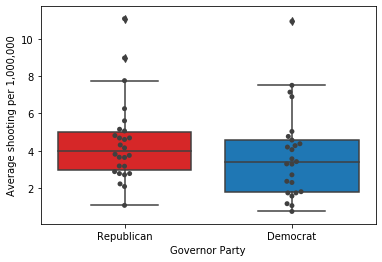

In [42]:
ax = sns.boxplot(x='Governor Party', y='Average shooting per 1,000,000', data=state_all)
ax = sns.swarmplot(x='Governor Party', y='Average shooting per 1,000,000', data=state_all, color='0.25')

# Select which box to change color    
Republican = ax.artists[0]
Democrat = ax.artists[1]

# Change the appearance of that box
Republican.set_facecolor('tab:red')
Democrat.set_facecolor('tab:blue')


In [10]:
# t test 
from scipy import stats

de = state_all.loc[state_all['Governor Party'] == 'Democrat', 'Average shooting per 1,000,000']
re = state_all.loc[state_all['Governor Party'] == 'Republican', 'Average shooting per 1,000,000']

stats.ttest_ind(de,re, equal_var = False)

Ttest_indResult(statistic=-0.9935600797734223, pvalue=0.32539634692674047)

In [38]:
# t test 
import pandas as pd
from scipy import stats
state1 = pd.read_excel('state1.xlsx')

de = state1.loc[state_all['Governor Party'] == 'Democrat', 'Total shooting']
re = state1.loc[state_all['Governor Party'] == 'Republican', 'Total shooting']

stats.ttest_ind(de,re, equal_var = False)

Ttest_indResult(statistic=0.9256428704805298, pvalue=0.36215753167284326)